In [1]:
import numpy as np
import meshpy
import meshpy.triangle as tri
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh, eigh
%matplotlib inline

In [2]:
mesh_info = tri.MeshInfo()
mesh_info.set_points([[0,0],
               [0,1],
               [1,1],
               [1,0]])
mesh_info.set_facets([[0,1],[1,2],[2,3],[3,0]])
def needs_refinement(vertex,area):
    return area > 0.1
mesh = tri.build(mesh_info,refinement_func=needs_refinement)

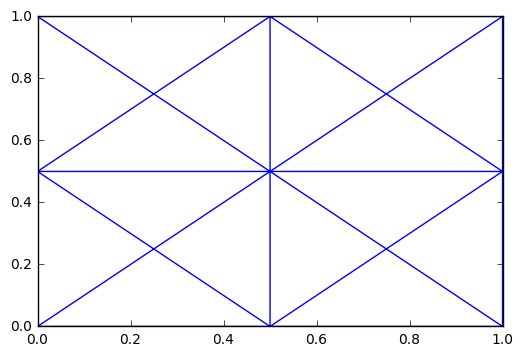

In [3]:
mesh_points = np.array(mesh.points)
mesh_tris = np.array(mesh.elements)

plt.triplot(mesh_points[:, 0], mesh_points[:, 1], mesh_tris)

In [26]:
N = mesh_points.shape[0]
K = np.zeros((N,N))
A = np.zeros((N,N))
points = mesh_points
norm = np.linalg.norm

def isBorder(point):
    x = point[0]
    y = point[1]
    return x > 0.99 or x < 0.01 or y > 0.99 or y < 0.01

for triangle in  mesh_tris:
    for i in range(3):
        # indices of points in triangles
        a = triangle[i-1]
        b = triangle[i]
        c = triangle[i-2]
        
        # the two vectors emanating from c
        ac = points[a] - points[c]        
        bc = points[b] - points[c]
        
        # can acutally avoid the normalization since it cancels in amp anyhow
        cosalph = np.abs(np.dot(ac,bc)) # / norm(ac) / norm(bc)
        sinalph = norm(np.cross(ac,bc)) # / norm(ac) / norm(bc)
        amp = cosalph / sinalph
        
        
        K[a,b] += amp
        K[b,a] += amp
        K[a,a] += -1 * amp
        K[b,b] += -1 * amp
        '''
for i, point in enumerate(mesh_points):
    if isBorder(point):
        print("border point")
        K[i,i]=0
        K[i,:]=0
        K[:,i]=0
        '''
borderindices = [i for i,point in enumerate(mesh_points) if isBorder(point)]
interiorindices = [i for i,point in enumerate(mesh_points) if not isBorder(point)]
borderkron = [(i,j) for i in borderindices for j in borderindices]
def kronindex(a, b):
    return [(i,j) for i in a for j in b]
A = K[borderkron]
B = K[kronindex(borderindices, interiorindices)] 
C = K[kronindex(interiorindices, borderindices)]
D = K[kronindex(interiorindices, interiorindices)]
print(C.shape)
Kprime = A - B @ np.linalg.inv(D) @ C

K = K/2
energies, funcs = eigh(K)
n, bins, patches = plt.hist(energies, 300, normed=1, facecolor='green', alpha=0.75)
print(energies[-30:])

        


IndexError: too many indices for array

In [5]:
print(K)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -4.  0.  0.  0.  1.  0.  1.  1.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0. -4.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. -4.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -4.]]


In [6]:
borderindices = [i for i,point in enumerate(mesh_points) if isBorder(point)]

In [25]:
print(kronindex(interiorindices, interiorindices))

[(4, 4), (4, 8), (4, 10), (4, 11), (4, 12), (8, 4), (8, 8), (8, 10), (8, 11), (8, 12), (10, 4), (10, 8), (10, 10), (10, 11), (10, 12), (11, 4), (11, 8), (11, 10), (11, 11), (11, 12), (12, 4), (12, 8), (12, 10), (12, 11), (12, 12)]


In [15]:
K[borderkron]

array([[[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.]],

       [[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  1.,  0.,  0.]],

       [[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., -1., ...,  0.,  1.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  1.,  1.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  1.],
        [ 0.,  0.,  0., ...,  1.,  1.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  1.,  1.],
        [ 0.,  0.,  0., ...,  0.,  1.,  1.]]])